<a href="https://colab.research.google.com/github/gyanoday06/Advertising_Sales/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

***Reading Data***

In [2]:
df = pd.read_csv('advertising_sales_data.csv')

In [3]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


***Saving to Feature Matrix (X) and Dependent Variable Vector (y)***

In [4]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

***Handling Missing Values***

In [35]:
imputer = SimpleImputer(strategy='mean')

df[['Radio']] = imputer.fit_transform(df[['Radio']])

In [36]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [8]:
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


***Splitting Dataset***

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
# Unnormalized Data
model_unnormalized = LinearRegression()
model_unnormalized.fit(X_train, y_train)

y_pred_unnormalized = model_unnormalized.predict(X_test)

mse_unnormalized = mean_squared_error(y_test, y_pred_unnormalized)
r2_unnormalized = r2_score(y_test, y_pred_unnormalized)

print(f'Mean Squared Error (Unnormalized): {mse_unnormalized}')
print(f'R^2 Score (Unnormalized): {r2_unnormalized}')

Mean Squared Error (Unnormalized): 2.4092185773771497
R^2 Score (Unnormalized): 0.8747286106321062


***Feature Scaling***

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Q1) What is the average amount spent on TV advertising in the dataset?***

In [14]:
average_tv_spend = df['TV'].mean()
print("The average amount spent on TV advertising is:", average_tv_spend)

The average amount spent on TV advertising is: 147.0425


***Q2) What is the correlation between radio advertising expenditure and product sales?***

The correlation between radio advertising expenditure and product sales is: 0.3497277129207837 



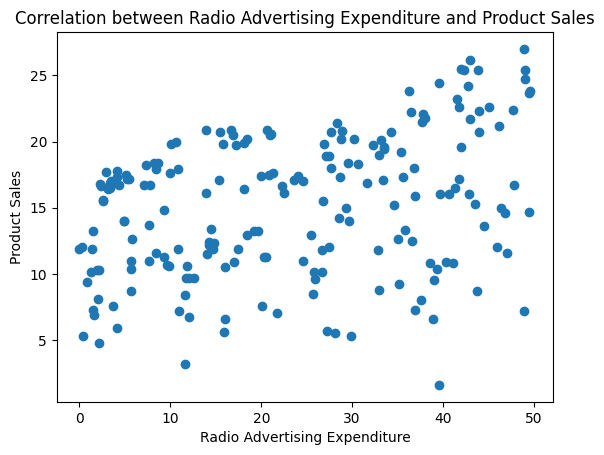

In [15]:
correlation = df['Radio'].corr(df['Sales'])
print("The correlation between radio advertising expenditure and product sales is:", correlation, "\n")

plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Product Sales')
plt.title('Correlation between Radio Advertising Expenditure and Product Sales')
plt.show()

***Q3) Which advertising medium has the highest impact on sales based on the dataset?***

The advertising medium with the highest impact on sales is: TV 





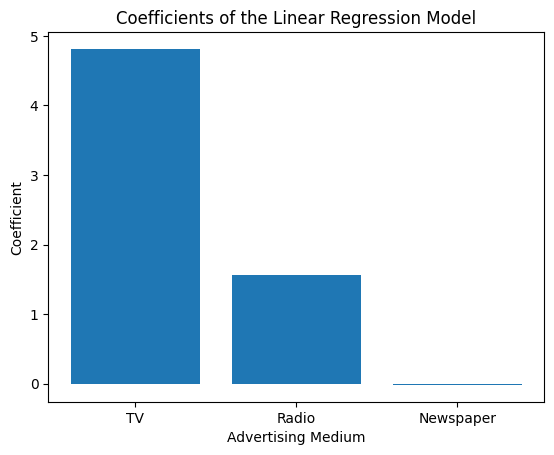



The correlation between TV advertising expenditure and product sales is: 0.9012079133023306 



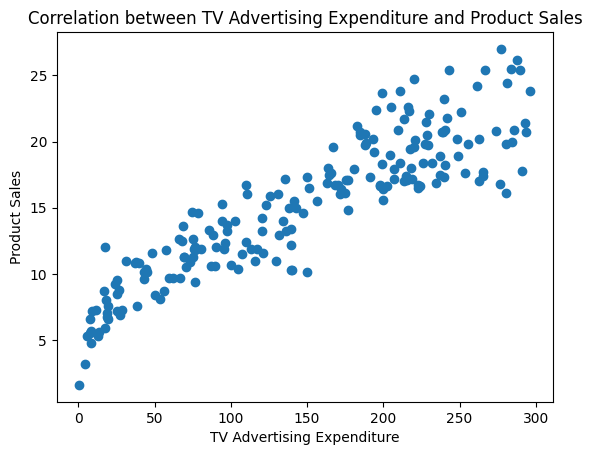

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coefficients = regressor.coef_

# Determining the advertising medium with the highest coefficient
highest_impact_medium = df.columns[1:-1][np.argmax(coefficients)]
print("The advertising medium with the highest impact on sales is:", highest_impact_medium, "\n")

print("\n")

plt.bar(df.columns[1:-1], coefficients)
plt.xlabel('Advertising Medium')
plt.ylabel('Coefficient')
plt.title('Coefficients of the Linear Regression Model')
plt.show()

print("\n")

correlation = df['TV'].corr(df['Sales'])
print("The correlation between TV advertising expenditure and product sales is:", correlation, "\n")

plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Product Sales')
plt.title('Correlation between TV Advertising Expenditure and Product Sales')
plt.show()

***Q4) Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.***

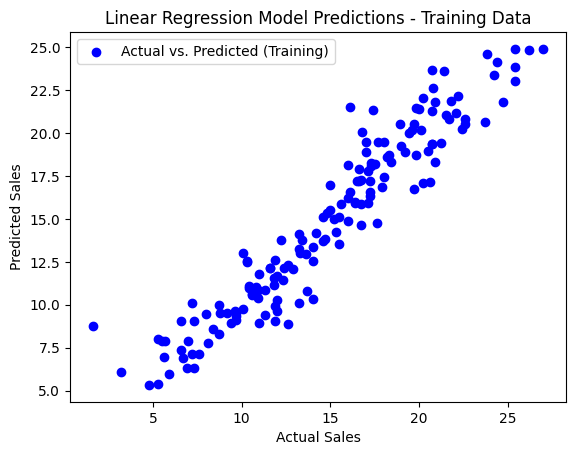

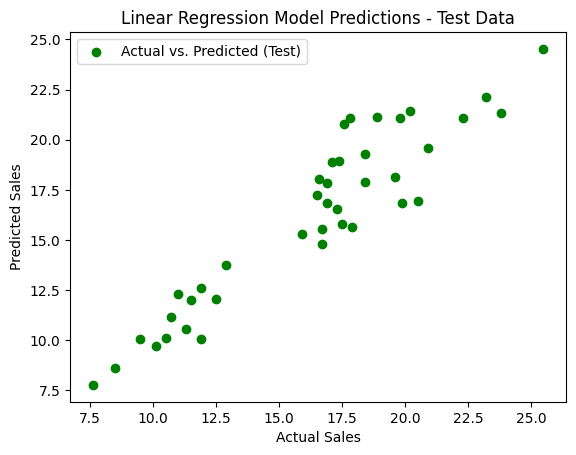

In [17]:
# Making predictions on Training set and Test Set
y_pred_train = regressor.predict(X_train)

y_pred_test = regressor.predict(X_test)

# Training Set
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Model Predictions - Training Data')
plt.legend()
plt.show()

print("\n")

# Test Set
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Test)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Model Predictions - Test Data')
plt.legend()
plt.show()


***Q5) How would sales be predicted for a new set of advertising expenditures: 200 on TV, 40 on Radio, and 50 on Newspaper?***

In [18]:
# Function to get user input and predict sales
def predict_sales():
    try:
        tv_exp = float(input("Enter the advertising expenditure on TV: "))
        radio_exp = float(input("Enter the advertising expenditure on Radio: "))
        newspaper_exp = float(input("Enter the advertising expenditure on Newspaper: "))

        new_expenditures = np.array([[tv_exp, radio_exp, newspaper_exp]])

        predicted_sales = regressor.predict(new_expenditures)

        print("\nThe predicted sales for the new advertising expenditures are:", predicted_sales[0])

    except ValueError:
        print("\nPlease enter valid numbers for the advertising expenditures.")

predict_sales()

Enter the advertising expenditure on TV: 200
Enter the advertising expenditure on Radio: 40
Enter the advertising expenditure on Newspaper: 50

The predicted sales for the new advertising expenditures are: 1039.041277928444


In [19]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

model_normalized = LinearRegression()
model_normalized.fit(X_train_normalized, y_train)

y_pred_normalized = model_normalized.predict(X_test_normalized)

mse_normalized = mean_squared_error(y_test, y_pred_normalized)
r2_normalized = r2_score(y_test, y_pred_normalized)

print(f'Mean Squared Error (Normalized): {mse_normalized}')
print(f'R^2 Score (Normalized): {r2_normalized}')

Mean Squared Error (Normalized): 2.409218577377149
R^2 Score (Normalized): 0.8747286106321063


***Q7) What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?***

Mean Squared Error (Radio and Newspaper): 19.082567784662967
R^2 Score (Radio and Newspaper): 0.007769655464713865 



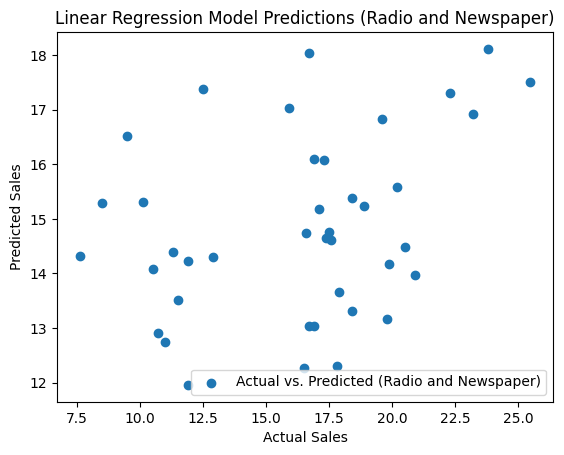

In [20]:
# Using only Radio and Newspaper as predictors
X_radio_newspaper = df[['Radio', 'Newspaper']].values

X_radio_newspaper = imputer.fit_transform(X_radio_newspaper)

X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=1)

regressor_rn = LinearRegression()
regressor_rn.fit(X_train_rn, y_train_rn)

y_pred_rn = regressor_rn.predict(X_test_rn)

mse_rn = mean_squared_error(y_test_rn, y_pred_rn)
r2_rn = r2_score(y_test_rn, y_pred_rn)

print(f'Mean Squared Error (Radio and Newspaper): {mse_rn}')
print(f'R^2 Score (Radio and Newspaper): {r2_rn}', "\n")

plt.scatter(y_test_rn, y_pred_rn, label='Actual vs. Predicted (Radio and Newspaper)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Model Predictions (Radio and Newspaper)')
plt.legend()
plt.show()

# ***By: Gyanoday Kothari***